# Exploratory Data Analysis

Load the required libraries. Apart from the standard <code>seaborn</code>and <code>matplotlib</code> libraries, <code>plotly</code> is used to create neat and aesthetically pleasing interactive charts. <code>collections</code> is used to count classes and the last line allows jupyter notebooks to render the plotly charts in-notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe'

Read the csv file.

In [2]:
weather=pd.read_csv("weather_data_1.csv")
weather

,timestamp,planning area,temperature,humidity,winddirection,windspeed,rainfall
0,2017-01-01 00:00:00,ang mo kio,26.10,90.5,NNE,2.00,0
1,2017-01-01 00:00:00,changi,26.15,92.9,NNW,1.65,0
2,2017-01-01 00:00:00,changi bay,26.60,87.1,N,2.10,0
3,2017-01-01 00:00:00,hougang,26.90,88.1,NE,2.20,0
4,2017-01-01 00:00:00,marina south,27.00,87.1,N,11.80,0
...,...,...,...,...,...,...,...
512439,2021-12-31 23:00:00,marina south,24.60,99.5,SE,2.10,1
512440,2021-12-31 23:00:00,sungei kadut,24.50,96.5,SE,0.70,0
512441,2021-12-31 23:00:00,tuas,25.30,83.2,WSW,1.30,0
512442,2021-12-31 23:00:00,western water catchment,24.10,92.6,ESE,1.90,0


## Distribution of Data

In [3]:
counts=pd.DataFrame.from_dict(Counter(weather.rainfall), orient='index').reset_index().rename(columns={'index':'rainfall', 0:'counts'})
counts
fig=go.Figure(data=[go.Pie(values=counts.counts.values, hole=.3, pull=0.1)])
fig.update_layout(title_text="Counts of Rainfall Variable",title_x=0.5)
fig.show()

The target class, rainfall, is highly imbalanced.

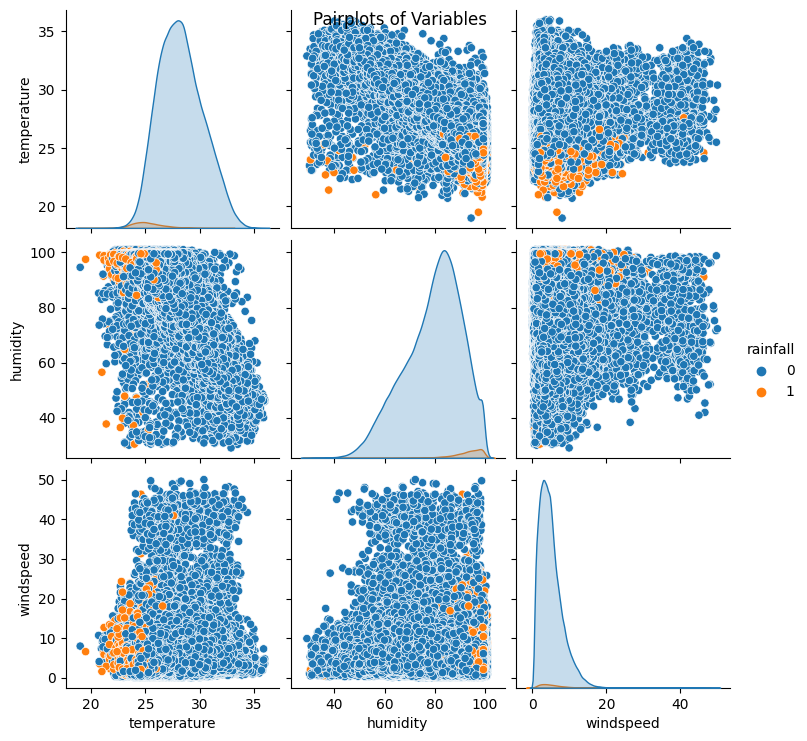

In [4]:
sns.pairplot(weather[["temperature","humidity","windspeed","rainfall"]],hue="rainfall")
plt.suptitle("Pairplots of Variables")
plt.show()

We note here that temperature has a normal distribution while humidity and windspeeds are more skewed.

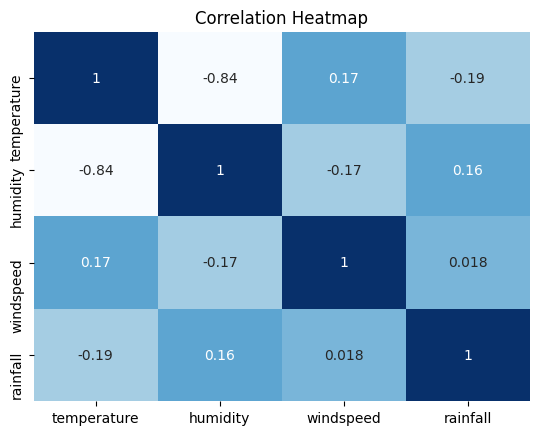

In [5]:
corr = weather[["temperature","humidity","windspeed","rainfall"]].corr()
sns.heatmap(corr,cmap="Blues",annot=True,cbar=False)
plt.title("Correlation Heatmap")
plt.show()

Here, we note that temperature and humidity are highly correlated but apart from that there are no other strong correlations between the numeric variables.

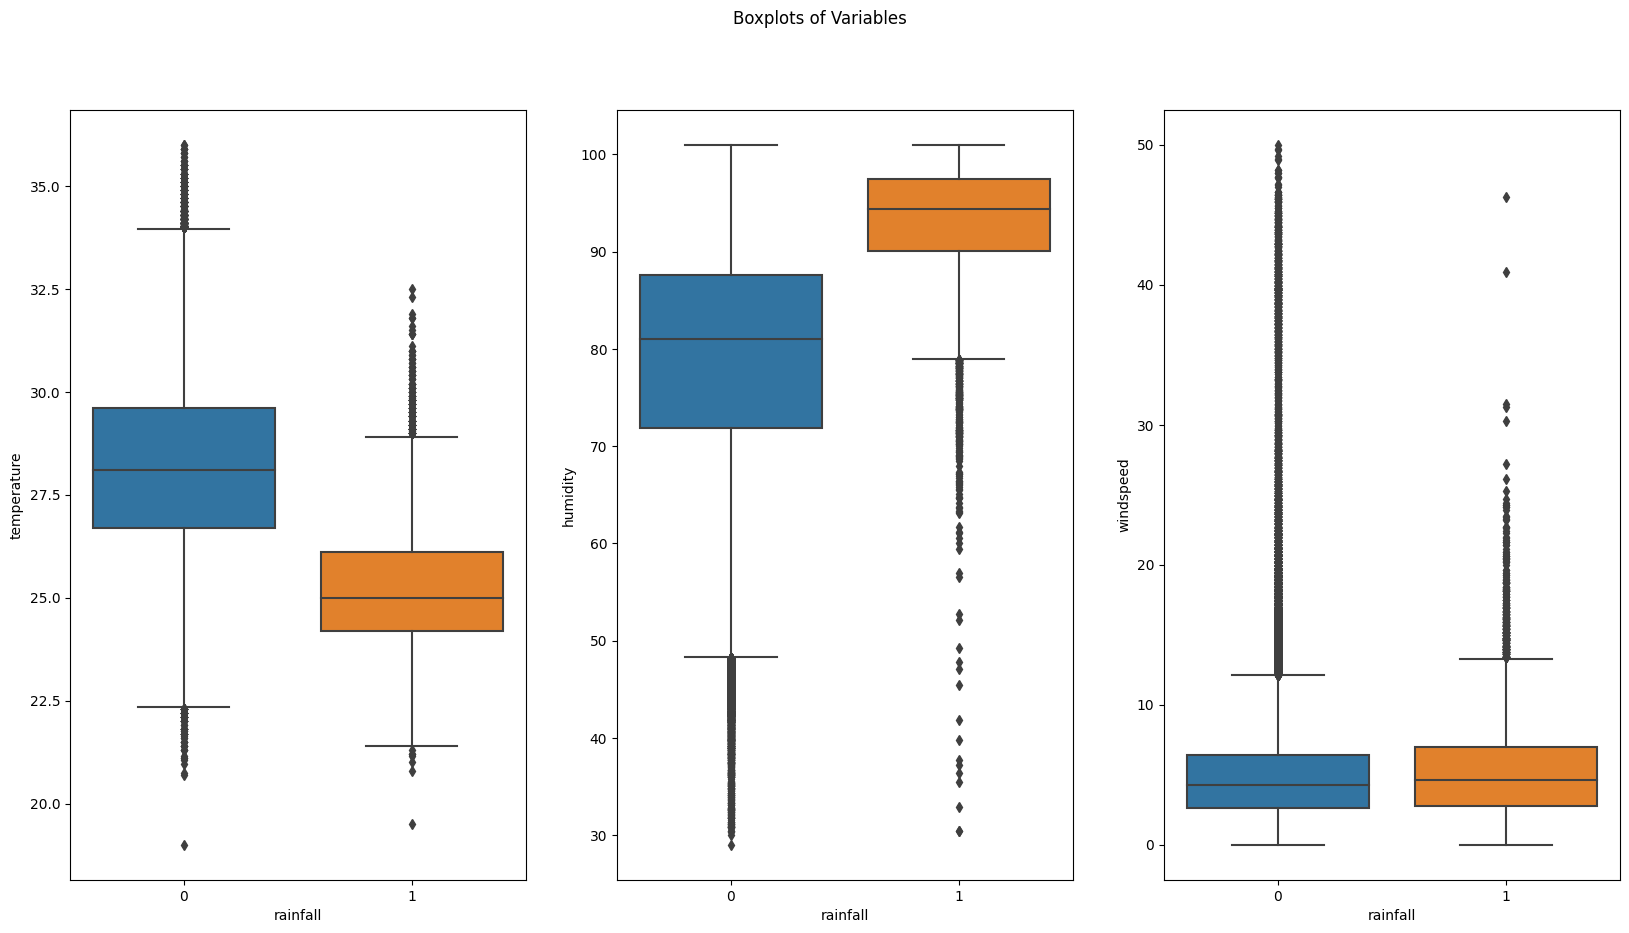

In [6]:
df=weather.drop(columns=["timestamp"])
fig, axs = plt.subplots(1,3, figsize=(20,10))
sns.boxplot(ax=axs[0],x=df.rainfall,y=df.temperature)
sns.boxplot(ax=axs[1],x=df.rainfall,y=df.humidity)
sns.boxplot(ax=axs[2],x=df.rainfall,y=df.windspeed)
plt.suptitle("Boxplots of Variables")
plt.show()

Lastly, we note that these variables have firstly different scales, and secondly, periods with rain have a lower temperature and higher humidity and windspeed.

## Time-series Graphs

In [9]:
weather.timestamp=pd.to_datetime(weather.timestamp,infer_datetime_format=True)
weather["year"]=weather.timestamp.apply(lambda x: x.year)
weather["quarter"]=weather.timestamp.apply(lambda x: x.quarter)
weather["month"]=weather.timestamp.apply(lambda x: x.month)
weather["day"]=weather.timestamp.apply(lambda x: x.day)
weather["hour"]=weather.timestamp.apply(lambda x: x.hour)
weather

,timestamp,planning area,temperature,humidity,winddirection,windspeed,rainfall,year,quarter,month,day,hour
0,2017-01-01 00:00:00,ang mo kio,26.10,90.5,NNE,2.00,0,2017,1,1,1,0
1,2017-01-01 00:00:00,changi,26.15,92.9,NNW,1.65,0,2017,1,1,1,0
2,2017-01-01 00:00:00,changi bay,26.60,87.1,N,2.10,0,2017,1,1,1,0
3,2017-01-01 00:00:00,hougang,26.90,88.1,NE,2.20,0,2017,1,1,1,0
4,2017-01-01 00:00:00,marina south,27.00,87.1,N,11.80,0,2017,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
512439,2021-12-31 23:00:00,marina south,24.60,99.5,SE,2.10,1,2021,4,12,31,23
512440,2021-12-31 23:00:00,sungei kadut,24.50,96.5,SE,0.70,0,2021,4,12,31,23
512441,2021-12-31 23:00:00,tuas,25.30,83.2,WSW,1.30,0,2021,4,12,31,23
512442,2021-12-31 23:00:00,western water catchment,24.10,92.6,ESE,1.90,0,2021,4,12,31,23


In [10]:
df=weather
df["date"]=df["year"].astype(str)+"-"+df["month"].astype(str)
df=df.groupby(["date"]).mean().reset_index()
fig=px.bar(df,x="date",y="rainfall")
fig.show()

We notice that the wetter periods are towards the beginning and ending of the year as well as in the middle of the year, hence we believe that there is a strong possibility that the prediction of rain will be affected by time variables.

In [14]:
df=weather
df=df.groupby(["hour","planning area"]).mean().reset_index()
fig=px.line(df,x="hour",y="temperature",color="planning area")
fig.show()

Lastly, temperature seems to have a cyclical pattern of rising in the afternoon and falling in the nighttime which suggest that the hours of the day may also affect the prediction if temperature proves to be useful.